Model Performance on Test Data:
Accuracy: 0.54
Precision: 0.49
Recall: 0.99
F1-score: 0.65
Kappa: 0.15
Model Performance on Train Data:
Accuracy: 0.91
Precision: 0.93
Recall: 0.74
F1-score: 0.82
Kappa: 0.77


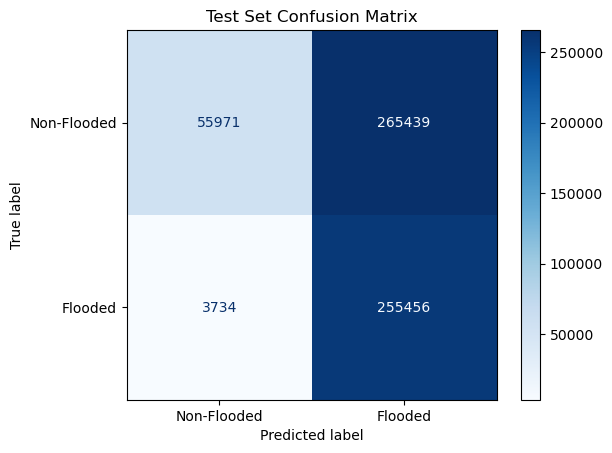

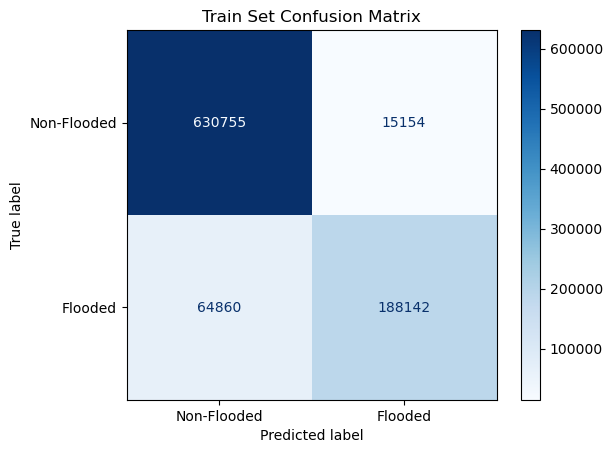

In [1]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Load first dataset (TRAINING DATA)
file_path1 = r"Bangladesh_Event1_Complete.csv"
df_train = pd.read_csv(file_path1)

# Load second dataset (TESTING DATA)
file_path2 = r"Bangladesh_Event2_Complete.csv"  # Change this to the actual file path
df_test = pd.read_csv(file_path2)

# Check if the required columns exist in both datasets
required_columns = ["VV", "VH", "Landcover", "Elevation", "Slope"]
for column in required_columns:
    if column not in df_train.columns or column not in df_test.columns:
        raise ValueError(f"Missing column: {column} in one of the datasets")

# Extract features and target variable
features = ["VV", "VH", "Landcover", "Elevation", "Slope"]  # Modify this based on available features

# Train Data
X_train = df_train[features].values
Y_train = df_train["Flooded"].values  # Flooded (1) / Non-flooded (0)

# Test Data
X_test = df_test[features].values
Y_test = df_test["Flooded"].values

# Train a Random Forest model
# Train a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=185, # default is 100 - Opinions vary on the best number of trees
    max_features="sqrt", #chooses the strongest
    min_samples_split=3, # default is 2 - minimum number of samples required to split an internal node
    max_depth=28, # default is None - maximum depth of the tree
    max_leaf_nodes=None, # default is None - maximum number of leaf nodes
    min_samples_leaf=3, # default is 1
    random_state=42 # default is None
)

rf_model.fit(X_train, Y_train)

# Make predictions on test set

Y_pred_train = rf_model.predict(X_train)
Y_pred_test = rf_model.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(Y_test, Y_pred_test)
precision1 = precision_score(Y_test, Y_pred_test)
recall1 = recall_score(Y_test, Y_pred_test)
f11 = f1_score(Y_test, Y_pred_test)
kappa11 = cohen_kappa_score(Y_test, Y_pred_test)

accuracy = accuracy_score(Y_train, Y_pred_train)
precision = precision_score(Y_train, Y_pred_train)
recall = recall_score(Y_train, Y_pred_train)
f1 = f1_score(Y_train, Y_pred_train)
kappa1 = cohen_kappa_score(Y_train, Y_pred_train)

print(f"Model Performance on Test Data:")
print(f"Accuracy: {accuracy1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")
print(f"F1-score: {f11:.2f}")
print(f"Kappa: {kappa11:.2f}")

print(f"Model Performance on Train Data:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Kappa: {kappa1:.2f}")


# Step 5: Evaluate the model
cm_test = confusion_matrix(Y_test, Y_pred_test)
cm_train = confusion_matrix(Y_train, Y_pred_train) 

# Function to plot confusion matrix without scientific notation
def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Flooded', 'Flooded'])
    fig, ax = plt.subplots()
    disp.plot(cmap='Blues', ax=ax, values_format='d')  # 'd' ensures integer display
    plt.title(title)
    plt.show()

# Plot the matrices
plot_confusion_matrix(cm_test, 'Test Set Confusion Matrix')
plot_confusion_matrix(cm_train, 'Train Set Confusion Matrix')
